In [8]:
import numpy as np
import pandas as pd

import scipy as sp
import scipy.stats

import matplotlib.pyplot as plt
import seaborn as sns

# os 패키지를 통해 현재 디렉토리 위치를 변경하고, read_csv를 더 편리하게 할 수 있음
import os
os.getcwd() # 현재 디렉토리 파악
# os.chdir(r"______") # 불러오고 싶은 파일이 위치한 주소를 ___에 입력

# 다른 노트북 작성할 때도 이 셀만 떼서 사용 가능하다.
import platform                

# 웬만하면 해주는 것이 좋다.
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin': #맥os 사용자의 경우에
    plt.style.use('seaborn-darkgrid') 
    rc('font', family = 'AppleGothic')
    
elif platform.system() == 'Windows':#윈도우 사용자의 경우에
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.style.use('seaborn-v0_8-whitegrid') # https://python-graph-gallery.co|m/199-matplotlib-style-sheets/
    rc('font', family=font_name)

## 1. scipy를 이용한 확률분포 분석

In [3]:
rv = sp.stats.norm()
rv

In [4]:
rv = sp.stats.norm(loc=1, scale=2)
rv

### 1.1 확률밀도함수

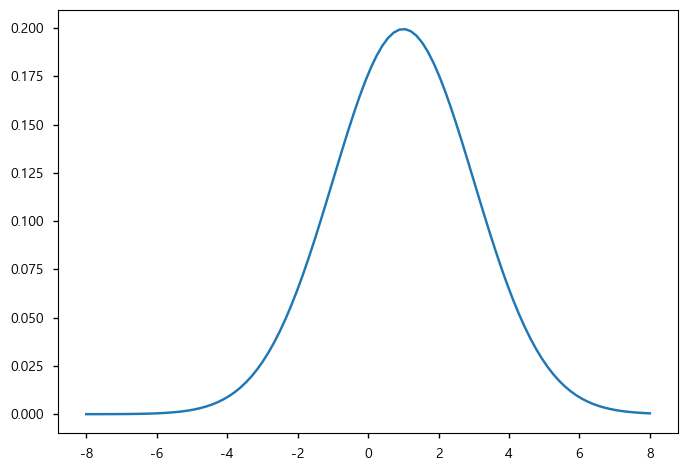

In [5]:
x = np.linspace(-8, 8, 100)
pdf = rv.pdf(x)

sns.lineplot(x=x, y=pdf)
plt.show()

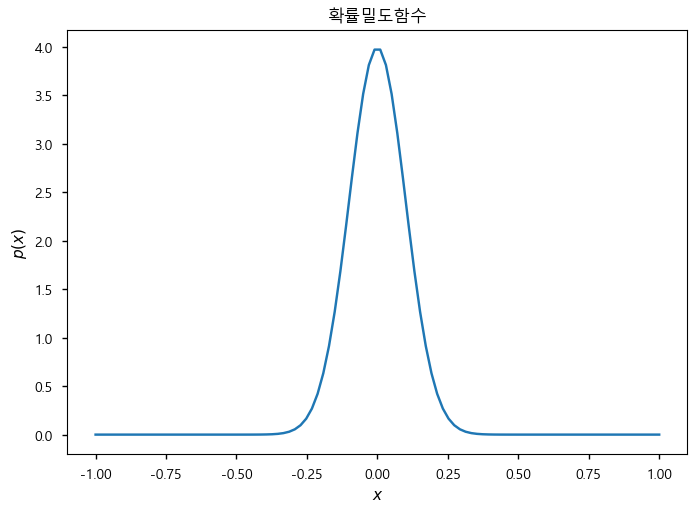

In [6]:
rv = sp.stats.norm(loc=0, scale=.1)

x = np.linspace(-1, 1, 100)
pdf = rv.pdf(x)

plt.plot(x, pdf)
plt.title('확률밀도함수')
plt.xlabel('$x$')
plt.ylabel('$p(x)$')
plt.show()

### 1.2 누적분포함수

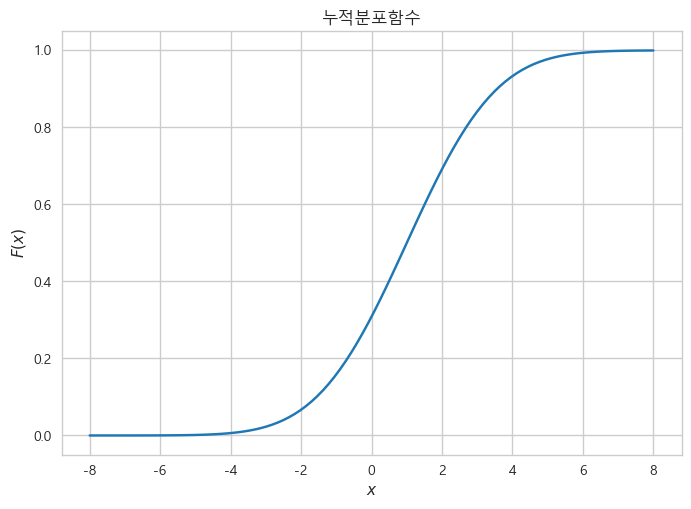

In [10]:
rv = sp.stats.norm(loc=1, scale=2)

x = np.linspace(-8, 8, 100)
cdf = rv.cdf(x)

plt.plot(x, cdf)
plt.title('누적분포함수')
plt.xlabel('$x$')
plt.ylabel('$F(x)$')
plt.show()

### 1.3 무작위 표본 생성

In [11]:
rv.rvs(size=(3, 5), random_state=0)

array([[ 4.52810469,  1.80031442,  2.95747597,  5.4817864 ,  4.73511598],
       [-0.95455576,  2.90017684,  0.69728558,  0.7935623 ,  1.821197  ],
       [ 1.28808714,  3.90854701,  2.52207545,  1.24335003,  1.88772647]])

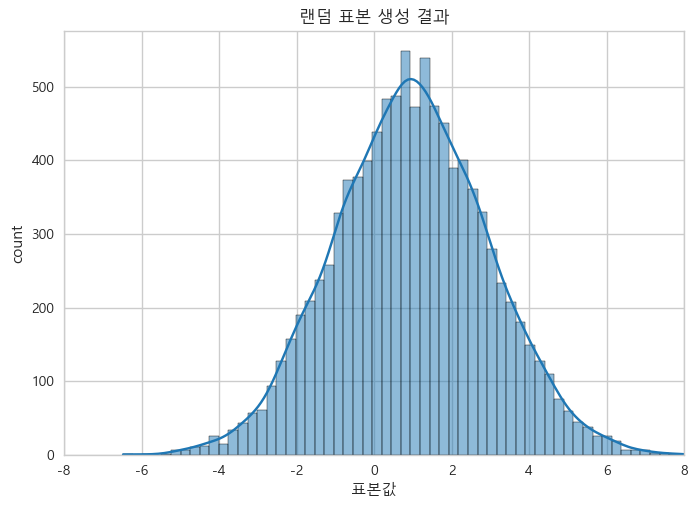

In [16]:
sns.histplot(rv.rvs(size=10000, random_state=0), kde=True, )

plt.title('랜덤 표본 생성 결과')
plt.xlabel('표본값')
plt.ylabel('count')
plt.xlim(-8, 8)
plt.show()

In [19]:
rv = sp.stats.norm(loc=1, scale=2)

In [29]:
sd1 = rv.rvs(size=1000, random_state=0)
np.mean(sd1), np.var(sd1), np.std(sd1)

(0.9094865850196092, 3.8969378252486173, 1.9740663173380517)

In [30]:
sd1 = rv.rvs(size=10000, random_state=0)
np.mean(sd1), np.var(sd1), np.std(sd1)

(0.9631325596834683, 3.9010719013911874, 1.9751131363522414)

In [31]:
sd1 = rv.rvs(size=100000, random_state=0)
np.mean(sd1), np.var(sd1), np.std(sd1)

(1.0031534010162506, 3.9787458116624754, 1.9946793756547632)

### 1.4 변환 확률변수의 시뮬레이션

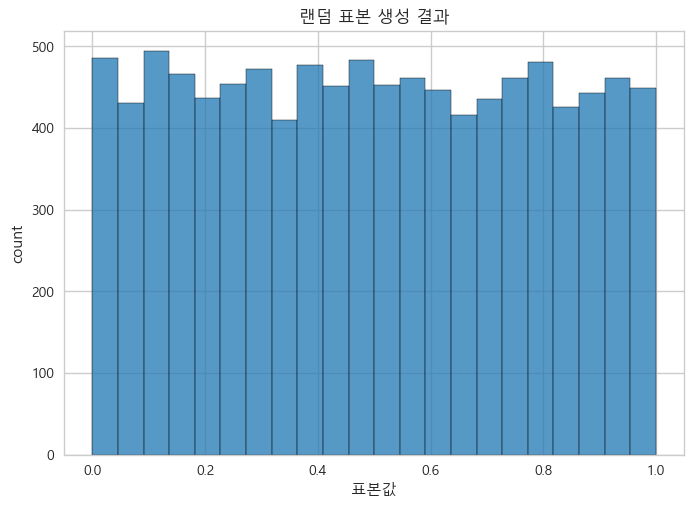

In [34]:
rv = sp.stats.uniform()

sns.histplot(rv.rvs(size=10000, random_state=0))

plt.title('랜덤 표본 생성 결과')
plt.xlabel('표본값')
plt.ylabel('count')
plt.show()

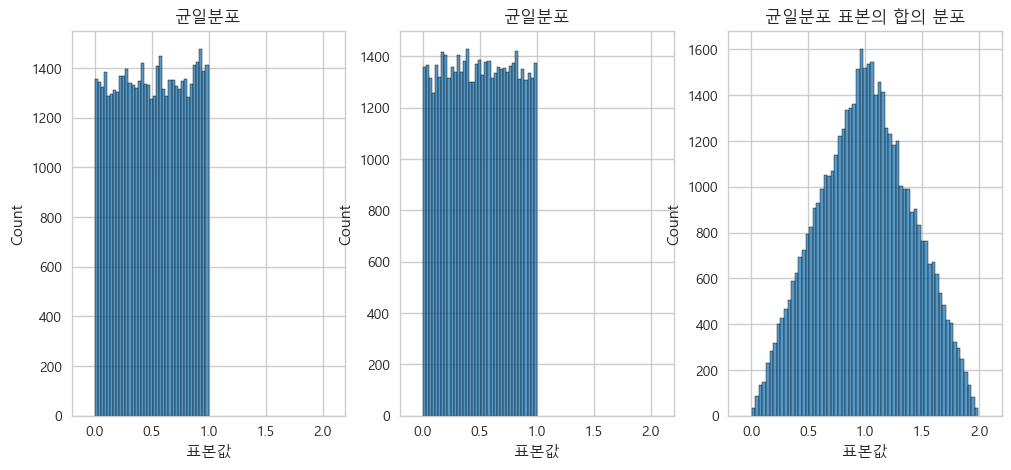

In [36]:
rv1 = sp.stats.uniform()
rv2 = sp.stats.uniform()

np.random.seed(808)
n = 50000
x1 = rv1.rvs(n)
x2 = rv2.rvs(n)
x3 = x1 + x2

plt.figure(figsize=(12, 5))

plt.subplot(131)
sns.histplot(x1)
plt.title('균일분포')
plt.xlabel('표본값')
plt.xlim(-.2, 2.2)

plt.subplot(132)
sns.histplot(x2)
plt.title('균일분포')
plt.xlabel('표본값')
plt.xlim(-.2, 2.2)

plt.subplot(133)
sns.histplot(x3)
plt.title('균일분포 표본의 합의 분포')
plt.xlabel('표본값')
plt.xlim(-.2, 2.2)

plt.show()

In [37]:
rv = sp.stats.uniform()
res = 0
res + rv.rvs(n)

array([0.40635399, 0.55777025, 0.69597592, ..., 0.16998605, 0.43323789,
       0.41515418])

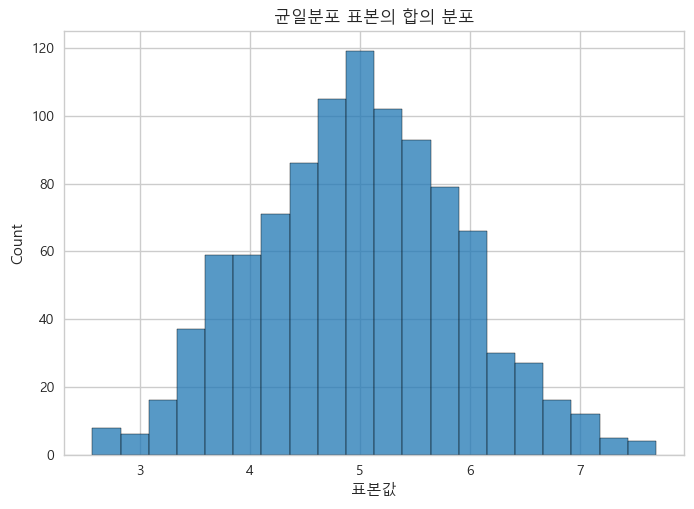

In [39]:
rv = sp.stats.uniform()
n = 1000
res = 0

for i in range(10):
    res += rv.rvs(n)

sns.histplot(res)
plt.title('균일분포 표본의 합의 분포')
plt.xlabel('표본값')

plt.show()